In [1]:
#Uploading the file
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

print("Shape:", df.shape)

Shape: (10000, 14)


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
#Checking the no of 0 bacl accounts
empty_balc = []
for i in df['Balance']:
  if i == 0:
    empty_balc.append(i)
  else:
    pass
print(len(empty_balc))

3617


In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
#Encoding Male and Female to 1 and 0
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Gender'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [13]:
#Spliting into X and Y
X = df.iloc[:, 3:13].values
Y = df.iloc[:, 13].values

print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (10000, 10)
Y: (10000,)


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Creating instance of LabelEncoder class
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

#Creating instance of OneHotEncoder class
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2,
                                                    random_state = 0)

In [0]:
#Standar Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#Building our baseline dummy classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()
clf.fit(X_train, y_train)

#Predicting Results
y_pred = clf.predict(X_test)

#Calculating Resulta
print("CM: \n",confusion_matrix(y_test, y_pred))
print("acc: {0}%".format(accuracy_score(y_test, y_pred) * 100))

CM: 
 [[1309  286]
 [ 312   93]]
acc: 70.1%


In [18]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


## Building Our Artificial Neural Network

In [19]:
# Initialising the ANN
classifier = Sequential()

#Input and 1st Hidden Layer
classifier.add(Dense(units = 13,
                     activation = 'relu',
                     kernel_initializer = 'uniform',
                     input_dim = 11))
classifier.add(Dropout(p = 0.2))


#2nd Hidden Layer
classifier.add(Dense(units = 13,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(p = 0.2))   


#3rd Hidden Layer
classifier.add(Dense(units = 13,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(p = 0.2))               

#Output Layer
classifier.add(Dense(units = 1,
                     activation = 'sigmoid',
                     kernel_initializer = 'uniform'))
               
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])               

W0701 19:00:23.255871 140424874956672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 19:00:23.272692 140424874956672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 19:00:23.274916 140424874956672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 19:00:23.290856 140424874956672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0701 19:00:23.300234 

In [20]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                156       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 84        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 13)                91        
_________________________________________________________________
dropout_3 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total para

In [21]:
#training our ANN Model
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_split=0.25)

Train on 6000 samples, validate on 2000 samples
Epoch 1/50
6000/6000 [==============================] - 2s 345us/step - loss: 0.5772 - acc: 0.7943 - val_loss: 0.4476 - val_acc: 0.7995
Epoch 2/50
6000/6000 [==============================] - 1s 122us/step - loss: 0.4515 - acc: 0.7948 - val_loss: 0.4355 - val_acc: 0.7995
Epoch 3/50
6000/6000 [==============================] - 1s 122us/step - loss: 0.4388 - acc: 0.7948 - val_loss: 0.4343 - val_acc: 0.7995
Epoch 4/50
6000/6000 [==============================] - 1s 123us/step - loss: 0.4408 - acc: 0.7948 - val_loss: 0.4332 - val_acc: 0.7995
Epoch 5/50
6000/6000 [==============================] - 1s 124us/step - loss: 0.4394 - acc: 0.7948 - val_loss: 0.4312 - val_acc: 0.7995
Epoch 6/50
6000/6000 [==============================] - 1s 121us/step - loss: 0.4376 - acc: 0.7948 - val_loss: 0.4293 - val_acc: 0.7995
Epoch 7/50
6000/6000 [==============================] - 1s 123us/step - loss: 0.4366 - acc: 0.7948 - val_loss: 0.4283 - val_acc: 0.7995


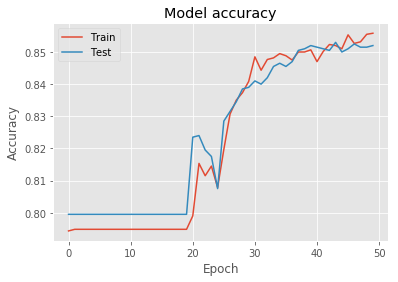

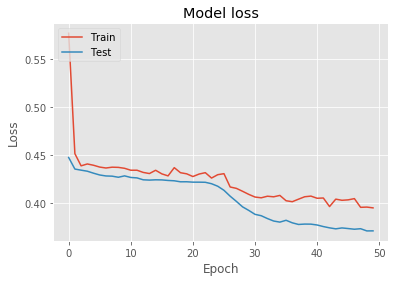

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [27]:
#Model Evaluation

print('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

print('Precision Score: ' + str(precision_score(y_test, y_pred)))

print('Recall Score: ' + str(recall_score(y_test, y_pred)))

print('F1 Score: ' + str(f1_score(y_test, y_pred)))

print('Classification Report: \n' + str(classification_report(y_test, y_pred)))

Accuracy Score: 0.8685
Precision Score: 0.8169642857142857
Recall Score: 0.45185185185185184
F1 Score: 0.5818759936406995
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1595
           1       0.82      0.45      0.58       405

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [33]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1554,   41],
       [ 222,  183]])

In [0]:
# Evaluating the ANN with KFold Cross Validation

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    
    classifier.add(Dense(units = 6, 
                         kernel_initializer = 'uniform', 
                         activation = 'relu', input_dim = 11))
    
    classifier.add(Dense(units = 6, 
                         kernel_initializer = 'uniform', 
                         activation = 'relu'))
    
    classifier.add(Dense(units = 1, 
                         kernel_initializer = 'uniform', 
                         activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', 
                       loss = 'binary_crossentropy', 
                       metrics = ['accuracy'])
    
    return classifier
  
classifier = KerasClassifier(build_fn = build_classifier, 
                             batch_size = 10, 
                             epochs = 100)

accuracies = cross_val_score(estimator = classifier, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10, 
                             n_jobs = -1)


In [36]:
mean = accuracies.mean()
print("Mean: ", mean)

variance = accuracies.std()
print('Variance: ', variance)

Mean:  0.850374994277954
Variance:  0.0177046069505954


In [0]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
    classifier = Sequential()
    
    classifier.add(Dense(units = 6, 
                         kernel_initializer = 'uniform', 
                         activation = 'relu', input_dim = 11))
    
    classifier.add(Dense(units = 6, 
                         kernel_initializer = 'uniform', 
                         activation = 'relu'))
    
    classifier.add(Dense(units = 1, 
                         kernel_initializer = 'uniform', 
                         activation = 'sigmoid'))
    
    classifier.compile(optimizer = optimizer, 
                       loss = 'binary_crossentropy', 
                       metrics = ['accuracy'])
    
    return classifier
  
classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [25, 32],
              'epochs': [100, 200],
              'optimizer': ['adam', 'rmsprop']}

random_search = RandomizedSearchCV(estimator = classifier,
                                   param_distributions  = parameters,
                                   n_iter = 15,
                                   cv = 10,
                                   n_jobs = -1)

random_search = random_search.fit(X_train, y_train)

In [0]:
best_parameters = random_search.best_params_
print(best_parameters)

best_accuracy = random_search.best_score_
print(best_accuracy)